In [1]:
import pandas as pd
import keras
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rice_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")

In [3]:
rice_dataset.shape

(3810, 8)

In [4]:
print(rice_dataset.head())

    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0        15617  0.572896  Cammeo  
1        15072  0.615436  Cammeo  
2        14954  0.693259  Cammeo  
3        13368  0.640669  Cammeo  
4        15262  0.646024  Cammeo  


In [5]:
print(rice_dataset.describe())

               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144753         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0

In [6]:
print(rice_dataset.columns)

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')


In [7]:
print(rice_dataset['Class'].value_counts())

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


In [8]:
feature_mean = rice_dataset.mean(numeric_only=True)
feature_std = rice_dataset.std(numeric_only=True)
numerical_features = rice_dataset.select_dtypes('number').columns
normalized_dataset = (rice_dataset[numerical_features] - feature_mean) / feature_std

In [9]:
label_encoder = LabelEncoder()
rice_dataset['Class'] = label_encoder.fit_transform(rice_dataset['Class'])

In [10]:
normalized_dataset['Class'] = rice_dataset['Class']

normalized_dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.479635,2.004091,2.348238,-0.212915,2.018073,1.499463,-1.152770,0
1,1.147720,1.125705,0.988261,0.945444,0.409964,1.192761,-0.602000,0
2,1.135020,1.317041,1.451718,0.253854,1.212797,1.126356,0.405558,0
3,0.293398,0.115285,0.261405,0.198025,0.239720,0.233826,-0.275315,0
4,1.166191,1.486858,1.316269,0.523351,0.952096,1.299685,-0.205986,0


In [21]:
print(rice_dataset.columns)

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')


In [23]:
normalized_dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.479635,2.004091,2.348238,-0.212915,2.018073,1.499463,-1.152770,0
1,1.147720,1.125705,0.988261,0.945444,0.409964,1.192761,-0.602000,0
2,1.135020,1.317041,1.451718,0.253854,1.212797,1.126356,0.405558,0
3,0.293398,0.115285,0.261405,0.198025,0.239720,0.233826,-0.275315,0
4,1.166191,1.486858,1.316269,0.523351,0.952096,1.299685,-0.205986,0


In [25]:
keras.utils.set_random_seed(42)

In [27]:
number_samples = len(normalized_dataset)
index_80th = round(number_samples * 0.8)
index_90th = index_80th + round(number_samples * 0.1)

shuffled_dataset = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_dataset.iloc[0:index_80th]
validation_data = shuffled_dataset.iloc[index_80th:index_90th]
test_data = shuffled_dataset.iloc[index_90th:]

test_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
2405,-0.438549,-0.661183,-0.825462,0.313231,-1.149000,-0.444856,0.341663,1
3062,-0.197838,-0.005342,0.224592,-0.656363,0.802824,-0.207936,1.606695,1
1155,1.381504,1.211330,1.081698,1.176669,0.340787,1.336264,0.710095,0
660,1.165037,1.016005,0.817115,1.311436,-0.002803,1.188822,-0.611756,0
2451,-1.154909,-1.193698,-1.423946,-0.278183,-1.477920,-1.106093,0.053997,1


In [29]:
train_data.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [31]:
label_columns = ['Class']

train_features = train_data.drop(columns=label_columns)
train_labels = train_data['Class'].to_numpy()
validation_features = validation_data.drop(columns=label_columns)
validation_labels = validation_data['Class'].to_numpy()
test_features = test_data.drop(columns=label_columns)
test_labels = test_data['Class'].to_numpy()

In [33]:
input_features = [
    'Eccentricity',
    'Major_Axis_Length',
    'Area',
]

In [35]:
import dataclasses


@dataclasses.dataclass()
class ExperimentSettings:
  learning_rate: float
  number_epochs: int
  batch_size: int
  classification_threshold: float
  input_features: list[str]


@dataclasses.dataclass()
class Experiment:
  name: str
  settings: ExperimentSettings
  model: keras.Model
  epochs: np.ndarray
  metrics_history: keras.callbacks.History

  def get_final_metric_value(self, metric_name: str) -> float:
    if metric_name not in self.metrics_history:
      raise ValueError(
          f'Unknown metric {metric_name}: available metrics are'
          f' {list(self.metrics_history.columns)}'
      )
    return self.metrics_history[metric_name].iloc[-1]


def create_model(settings: ExperimentSettings, metrics: list[keras.metrics.Metric],) -> keras.Model:
  model_inputs = [keras.Input(name=feature, shape=(1,)) for feature in settings.input_features]

  concatenated_inputs = keras.layers.Concatenate()(model_inputs)
  dense = keras.layers.Dense(units=1, input_shape=(1,), name='dense_layer', activation=keras.activations.sigmoid)
  model_output = dense(concatenated_inputs)
  model = keras.Model(inputs=model_inputs, outputs=model_output)
  model.compile(
      optimizer=keras.optimizers.RMSprop(
          settings.learning_rate
      ),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics,
  )
  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    labels: np.ndarray,
    settings: ExperimentSettings,
) -> Experiment:
    
  features = {
      feature_name: np.array(dataset[feature_name])
      for feature_name in settings.input_features
  }

  history = model.fit(
      x=features,
      y=labels,
      batch_size=settings.batch_size,
      epochs=settings.number_epochs,
  )

  return Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )


print('Defined the create_model and train_model functions.')

Defined the create_model and train_model functions.


In [37]:
def plot_experiment_metrics(experiment: Experiment, metrics: list[str]):
  plt.figure(figsize=(8, 4))

  for metric in metrics:
    plt.plot(
        experiment.epochs, experiment.metrics_history[metric], label=metric
    )

  plt.xlabel("Epoch")
  plt.ylabel("Metric value")
  plt.grid()
  plt.legend()


print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/60
31/31 [==============================] - 2s 6ms/step - loss: 1.0784 - accuracy: 0.3376 - precision: 0.4369 - recall: 0.5572 - auc: 0.1662
Epoch 2/60
31/31 [==============================] - 0s 4ms/step - loss: 1.0292 - accuracy: 0.3606 - precision: 0.4541 - recall: 0.5969 - auc: 0.1899
Epoch 3/60
31/31 [==============================] - 0s 5ms/step - loss: 0.9842 - accuracy: 0.3894 - precision: 0.4742 - recall: 0.6446 - auc: 0.2158
Epoch 4/60
31/31 [==============================] - 0s 5ms/step - loss: 0.9408 - accuracy: 0.4124 - precision: 0.4893 - recall: 0.6826 - auc: 0.2465
Epoch 5/60
31/31 [==============================] - 0s 3ms/step - loss: 0.8991 - accuracy: 0.4380 - precision: 0.5052 - recall: 0.7223 - auc: 0.2821
Epoch 6/60
31/31 [==============================] - 0s 4ms/step - loss: 0.8584 - accuracy: 0.4678 - precision: 0.5228 - recall: 0.7711 - auc: 0.3239
Epoch 7/60
31/31 [==============================] - 0s 5ms/step - loss: 0.8193 - accuracy: 0.4921 - precis

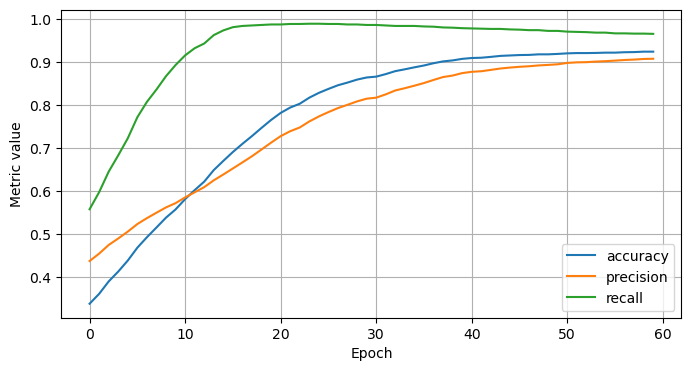

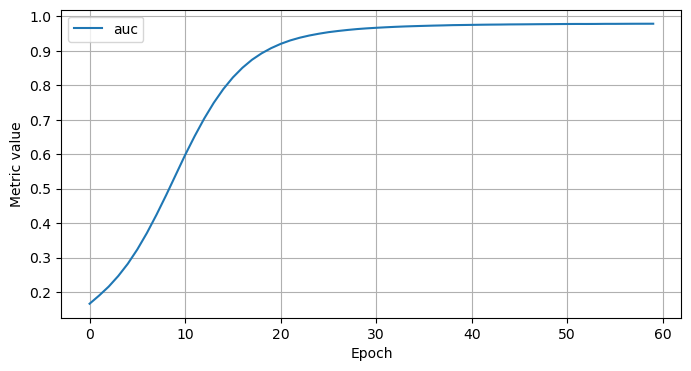

In [39]:
# Let's define our first experiment settings.
settings = ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.35,
    input_features=input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=settings.classification_threshold
    ),
    keras.metrics.Precision(
        name='precision', thresholds=settings.classification_threshold
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model = create_model(settings, metrics)

# Train the model on the training set.
experiment = train_model(
    'baseline', model, train_features, train_labels, settings
)

# Plot metrics vs. epochs
plot_experiment_metrics(experiment, ['accuracy', 'precision', 'recall'])
plot_experiment_metrics(experiment, ['auc'])

In [40]:
def evaluate_experiment(
    experiment: Experiment, test_dataset: pd.DataFrame, test_labels: np.array
) -> dict[str, float]:
  features = {
      feature_name: np.array(test_dataset[feature_name])
      for feature_name in experiment.settings.input_features
  }
  return experiment.model.evaluate(
      x=features,
      y=test_labels,
      batch_size=settings.batch_size,
      verbose=0, # Hide progress bar
      return_dict=True,
  )


def compare_train_test(experiment: Experiment, test_metrics: dict[str, float]):
  print('Comparing metrics between train and test:')
  for metric, test_value in test_metrics.items():
    print('------')
    print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
    print(f'Test {metric}:  {test_value:.4f}')


# Evaluate test metrics
test_metrics = evaluate_experiment(experiment, test_features, test_labels)
compare_train_test(experiment, test_metrics)

Comparing metrics between train and test:
------
Train loss: 0.1887
Test loss:  0.1943
------
Train accuracy: 0.9236
Test accuracy:  0.9134
------
Train precision: 0.9070
Test precision:  0.8889
------
Train recall: 0.9649
Test recall:  0.9782
------
Train auc: 0.9788
Test auc:  0.9761


In [47]:
all_input_features = [
  'Eccentricity',
  'Major_Axis_Length',
  'Minor_Axis_Length',
  'Area',
  'Convex_Area',
  'Perimeter',
  'Extent',
]

Epoch 1/60
31/31 [==============================] - 3s 6ms/step - loss: 1.1418 - accuracy: 0.1401 - precision: 0.1963 - recall: 0.1639 - auc: 0.0568
Epoch 2/60
31/31 [==============================] - 0s 6ms/step - loss: 1.0464 - accuracy: 0.1621 - precision: 0.2292 - recall: 0.1984 - auc: 0.0742
Epoch 3/60
31/31 [==============================] - 0s 5ms/step - loss: 0.9620 - accuracy: 0.1982 - precision: 0.2745 - recall: 0.2467 - auc: 0.1022
Epoch 4/60
31/31 [==============================] - 0s 4ms/step - loss: 0.8837 - accuracy: 0.2484 - precision: 0.3315 - recall: 0.3122 - auc: 0.1533
Epoch 5/60
31/31 [==============================] - 0s 4ms/step - loss: 0.8103 - accuracy: 0.3268 - precision: 0.4062 - recall: 0.3899 - auc: 0.2447
Epoch 6/60
31/31 [==============================] - 0s 5ms/step - loss: 0.7425 - accuracy: 0.4469 - precision: 0.5158 - recall: 0.4980 - auc: 0.3931
Epoch 7/60
31/31 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5784 - precis

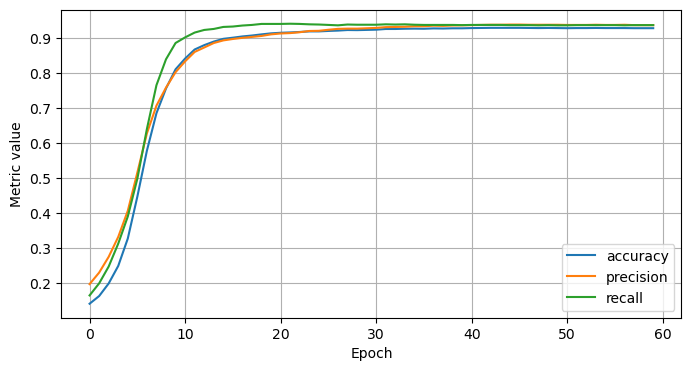

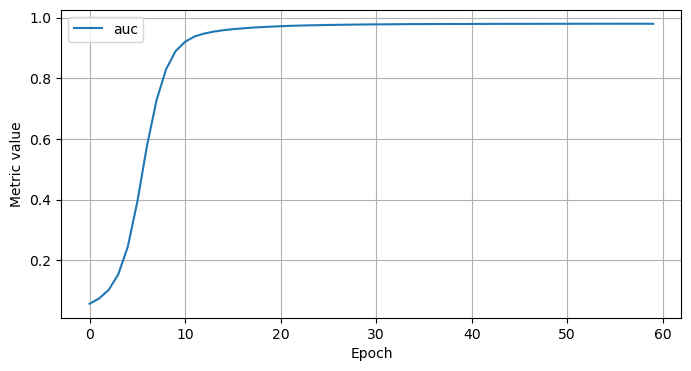

In [49]:
settings_all_features = ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.5,
    input_features=all_input_features,
)

# Modify the following definition of METRICS to generate
# not only accuracy and precision, but also recall:
metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy',
        threshold=settings_all_features.classification_threshold,
    ),
    keras.metrics.Precision(
        name='precision',
        thresholds=settings_all_features.classification_threshold,
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings_all_features.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model_all_features = create_model(settings_all_features, metrics)

# Train the model on the training set.
experiment_all_features = train_model(
    'all features',
    model_all_features,
    train_features,
    train_labels,
    settings_all_features,
)

# Plot metrics vs. epochs
plot_experiment_metrics(
    experiment_all_features, ['accuracy', 'precision', 'recall']
)
plot_experiment_metrics(experiment_all_features, ['auc'])

In [51]:
test_metrics_all_features = evaluate_experiment(
    experiment_all_features, test_features, test_labels
)
compare_train_test(experiment_all_features, test_metrics_all_features)

Comparing metrics between train and test:
------
Train loss: 0.1800
Test loss:  0.1876
------
Train accuracy: 0.9291
Test accuracy:  0.9265
------
Train precision: 0.9379
Test precision:  0.9351
------
Train recall: 0.9379
Test recall:  0.9432
------
Train auc: 0.9793
Test auc:  0.9774
